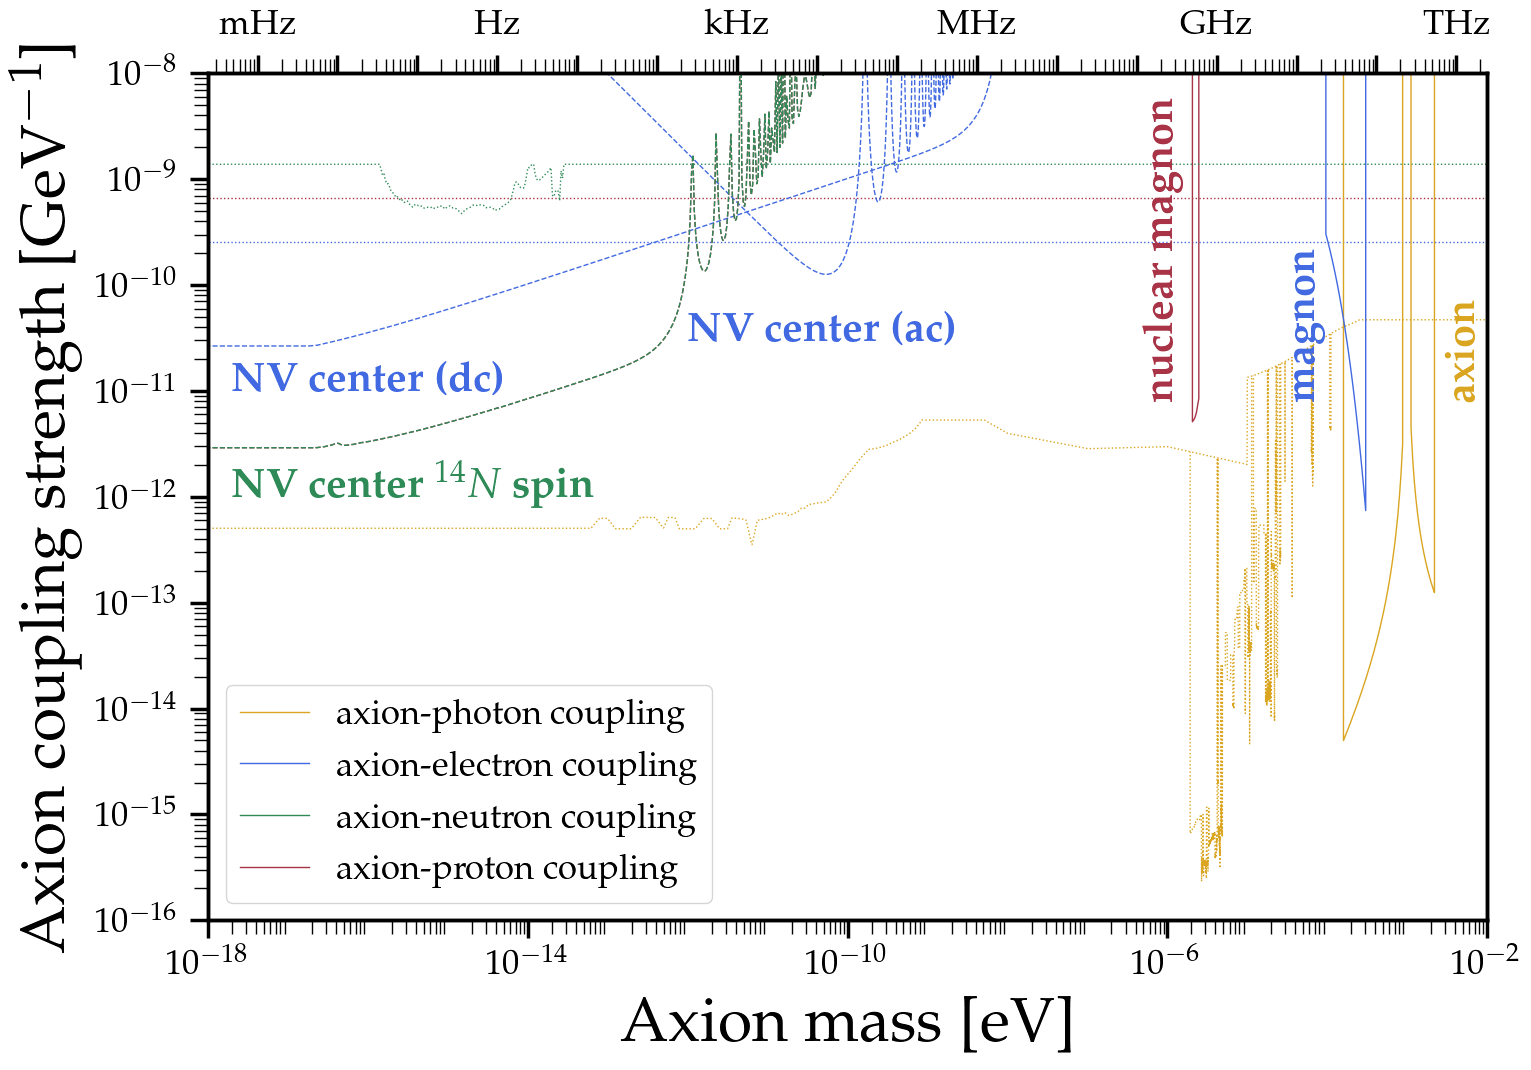

In [16]:
from numpy import *
import matplotlib.pyplot as plt
from PlotFuncs import *

fig,ax = FigSetup(xlab='Axion mass [eV]',ylab='Axion coupling strength [GeV$^{-1}$]',m_min=1e-24,m_max=1e12,g_min=1e-20,g_max=1e-1,xtick_rotation=0,mathpazo=True)

# Constraints on gagg
MySimplePlot(ax,"limit_data/AxionPhoton/Haloscopes_Combined_microeV-meV.txt",edgecolor='goldenrod',linestyle=':',zorder=-4,lw=1)
PlotBound(ax,"limit_data/AxionPhoton/Combined_Astro.txt",edgecolor='goldenrod',facecolor='white',linestyle=':',zorder=-3,lw=1)

# Constraints on gaee / me
me_in_GeV = 0.511e-3
MySimplePlot(ax,"limit_data/AxionElectron/RedGiants_HighMass.txt",scale_y=1/me_in_GeV,edgecolor='royalblue',linestyle=':',zorder=0,lw=1)

# Constraints on gann / mn
mn_in_GeV = 939.565e-3
# MySimplePlot(ax,"limit_data/AxionNeutron/K-3He_Comagnetometer_DarkMatter.txt",scale_y=2,edgecolor='black',linestyle='--',zorder=-2,lw=1)
# MySimplePlot(ax,"limit_data/AxionNeutron/ChangE.txt",scale_y=2,edgecolor='black',linestyle='--',zorder=-2,lw=1)
# PlotBound(ax,"limit_data/AxionNeutron/NeutronStars.txt",scale_y=1/mn_in_GeV,edgecolor='black',facecolor='white',linestyle='--',zorder=-1,lw=1)
data = np.load('limit_data/MyWorks/gann_constraints.npz')
ax.plot(np.append(data['ma'],1e-2),np.append(data['y'],data['y'][-1])/mn_in_GeV,color='seagreen',linestyle=':',lw=1)

# Constraints on gapp / mp
mp_in_GeV = 938.272e-3
MySimplePlot(ax,"limit_data/AxionProton/SN1987A.txt",scale_y=1/mp_in_GeV,edgecolor='#a83246',linestyle=':',zorder=0,lw=1)

# collective excitations
data = np.load('limit_data/MyWorks/gagg_axion_M.npz')
ax.plot(data['ma'],data['y'],color='goldenrod',linestyle='-',lw=1,label='axion-photon coupling')
data = np.load('limit_data/MyWorks/gagg_axion_P.npz')
ax.plot(data['ma'],data['y'],color='goldenrod',linestyle='-',lw=1)
data = np.load('limit_data/MyWorks/gaee_magnon.npz')
ax.plot(data['ma'],data['y']/me_in_GeV,color='royalblue',linestyle='-',lw=1,label='axion-electron coupling')
ax.plot([0],[0],color='seagreen',linestyle='-',lw=1,label='axion-neutron coupling') # dummy for legend
MySimplePlot(ax,"limit_data/AxionProton/Projections/MnCO3.txt",scale_y=1/mp_in_GeV,edgecolor='#a83246',linestyle='-',zorder=0,lw=1,label='axion-proton coupling')
plt.text(3e-3,1e-11,r'{\bf axion}',fontsize=30,color='goldenrod',rotation=90,alpha=1)
plt.text(3e-5,1e-11,r'{\bf magnon}',fontsize=30,color='royalblue',rotation=90,alpha=1)
plt.text(5e-7,1e-11,r'{\bf nuclear magnon}',fontsize=30,color='#a83246',rotation=90,alpha=1)

# NV center
data = np.load('limit_data/MyWorks/gaee_NV_dc.npz')
ax.plot(np.hstack([[1e-22],data['ma']]),np.hstack([[data['y'][0]],data['y']])/me_in_GeV,color='royalblue',linestyle='--',lw=1)
data = np.load('limit_data/MyWorks/gaee_NV_ac.npz')
ax.plot(data['ma'],data['y']/me_in_GeV,color='royalblue',linestyle='--',lw=1)
plt.text(2e-18,1e-11,r'{\bf NV center (dc)}',fontsize=30,color='royalblue',alpha=1)
plt.text(1e-12,3e-11,r'{\bf NV center (ac)}',fontsize=30,color='royalblue',alpha=1)

# NV center (nuclear)
data = np.load('limit_data/MyWorks/gapp_NV_dc.npz')
ax.plot(data['ma'],data['y']/mp_in_GeV,color='#a83246',linestyle='--',lw=1)
data = np.load('limit_data/MyWorks/gann_NV_dc.npz')
ax.plot(data['ma'],data['y']/mn_in_GeV,color='seagreen',linestyle='--',lw=1)
# data = np.load('limit_data/MyWorks/gapp_NV_ac.npz')
# ax.plot(data['ma'],data['y']/mp_in_GeV,color='seagreen',linestyle='-',lw=1)
# data = np.load('limit_data/MyWorks/gann_NV_ac.npz')
# ax.plot(data['ma'],data['y']/mn_in_GeV,color='seagreen',linestyle='-',lw=1)
plt.text(2e-18,1e-12,r'{\bf NV center $^{14}N$ spin}',fontsize=30,color='seagreen',alpha=1)

# my x-axis
ax.set_xlim(1e-18, 1e-2)
ax.set_xticks(10.0**arange(-18,2,4))

# my upper x-axis
UpperFrequencyAxis_Simple(ax)

# my y-axis
ax.set_ylim(1e-16, 1e-8)

# my settings
ax.legend(loc='lower left', fontsize=25)

MySaveFig(fig,'Summary_Plot_2024')